## Лабораторная работа №1 | Вариант 5

Выполнила: Леоненкова Елена М8О-311Б-23

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
matrix=np.eye(3)
print(matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [3]:
rgba_dtype = np.dtype([
    ('r', np.uint8), 
    ('g', np.uint8), 
    ('b', np.uint8),  
    ('a', np.uint8)   
])

print(rgba_dtype)

[('r', 'u1'), ('g', 'u1'), ('b', 'u1'), ('a', 'u1')]


3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [4]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [5]:
r_vect=np.random.rand(10)
print(r_vect)
s_vect=np.sort(r_vect)
print(s_vect)

[0.34313268 0.29750862 0.24275369 0.16780025 0.58190396 0.45841561
 0.22832527 0.1440895  0.80662468 0.60076778]
[0.1440895  0.16780025 0.22832527 0.24275369 0.29750862 0.34313268
 0.45841561 0.58190396 0.60076778 0.80662468]


5. Создайте read-only массив(неизменяемый)

In [6]:
arr = np.array([1, 2, 3, 4, 5])
arr.flags.writeable = False
arr[2] = 777


ValueError: assignment destination is read-only

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [7]:
matrix_cartesian = np.random.rand(10,2) * 10
print(matrix_cartesian)
x=matrix_cartesian[:,0]
y=matrix_cartesian[:,1]
r = np.sqrt(x**2 + y**2)
phi=np.arctan2(y,x)
matrix_polar=np.column_stack((r,phi))
print(matrix_polar)

[[6.72636763 3.80281104]
 [6.16405591 4.69726846]
 [1.97856481 0.53937453]
 [7.18418587 6.32365918]
 [1.02234175 2.90640332]
 [3.4208981  4.94450373]
 [6.90258824 3.24785758]
 [9.8215198  0.8272123 ]
 [0.24948548 5.21713428]
 [3.35986729 2.60189646]]
[[7.72692651 0.51455847]
 [7.7498333  0.65116344]
 [2.05076658 0.26614194]
 [9.57085116 0.72177844]
 [3.08096785 1.23255893]
 [6.01254197 0.96555522]
 [7.62851908 0.43979286]
 [9.856294   0.08402616]
 [5.22309613 1.52301232]
 [4.24953802 0.65893794]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [8]:
x = np.linspace(0, 1, 10)  
y = np.linspace(0, 1, 10)  
X, Y = np.meshgrid(x, y)
coordinates = np.empty(X.shape, dtype=[('x', float), ('y', float)])
coordinates['x'], coordinates['y'] = X, Y

coordinates

array([[(0.        , 0.        ), (0.11111111, 0.        ),
        (0.22222222, 0.        ), (0.33333333, 0.        ),
        (0.44444444, 0.        ), (0.55555556, 0.        ),
        (0.66666667, 0.        ), (0.77777778, 0.        ),
        (0.88888889, 0.        ), (1.        , 0.        )],
       [(0.        , 0.11111111), (0.11111111, 0.11111111),
        (0.22222222, 0.11111111), (0.33333333, 0.11111111),
        (0.44444444, 0.11111111), (0.55555556, 0.11111111),
        (0.66666667, 0.11111111), (0.77777778, 0.11111111),
        (0.88888889, 0.11111111), (1.        , 0.11111111)],
       [(0.        , 0.22222222), (0.11111111, 0.22222222),
        (0.22222222, 0.22222222), (0.33333333, 0.22222222),
        (0.44444444, 0.22222222), (0.55555556, 0.22222222),
        (0.66666667, 0.22222222), (0.77777778, 0.22222222),
        (0.88888889, 0.22222222), (1.        , 0.22222222)],
       [(0.        , 0.33333333), (0.11111111, 0.33333333),
        (0.22222222, 0.33333333), (0.

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [9]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
def cauchy(i, j):
    return 1 / (x[i.astype(int)] - y[j.astype(int)])
C = np.fromfunction(cauchy, shape=(len(x), len(y)), dtype=float)
C

array([[  -0.78428121,   -3.09966902,   -1.35059858, -141.820425  ,
          -0.99244566],
       [  -0.53362668,   -1.0851501 ,   -0.74664261,   -1.6502533 ,
          -0.62246026],
       [  -2.76431999,    1.69294928,    5.78409836,    1.10344941,
         -10.60314965],
       [  -0.72851992,   -2.3797722 ,   -1.19330938,   -9.55617612,
          -0.90480948],
       [  -1.82298906,    2.47593314,  -71.89469838,    1.3899467 ,
          -3.55734373]])

9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [10]:
arr_float = np.array([1.5, 2.7, 3.2, 4.9], dtype=np.float32)
print(arr_float)
print(f"Тип: {arr_float.dtype}\n")

arr_int = arr_float.astype(np.int32)
print(arr_int)
print(f"Тип: {arr_int.dtype}\n")

[1.5 2.7 3.2 4.9]
Тип: float32

[1 2 3 4]
Тип: int32



10. Как случайно заменить p элементов в 2D массиве?

In [11]:
arr = np.arange(1, 21).reshape(4, 5)
r = 5 
value = 0  

total_elements = arr.size
flat_indices = np.random.choice(total_elements, size=r, replace=False)
coords = np.unravel_index(flat_indices, arr.shape)
arr[coords] = value

arr

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9,  0],
       [11, 12, 13,  0, 15],
       [ 0, 17,  0,  0, 20]])

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


1. Узнайте сколько было на борту человек

In [14]:
len(df)

891

2. Какой медианный и средний возраста пассажиров

In [15]:
df["Age"].mean(), df["Age"].median()

(29.69911764705882, 28.0)

3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [16]:
df[df['Age'] < 16]['Survived'].mean() * 100, df[df['Age'] >= 18]['Survived'].mean() * 100 

(59.036144578313255, 38.10316139767055)

4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [17]:
women_survival = df[df['Sex'] == 'female']['Survived'].mean() * 100
children_survival = df[df['Age'] < 18]['Survived'].mean() * 100
men_survival = df[df['Sex'] == 'male']['Survived'].mean() * 100
adults_survival = df[df['Age'] >= 18]['Survived'].mean() * 100

print(f"Женщины: {women_survival:.2f}%")
print(f"Дети (<18): {children_survival:.2f}%")
print(f"Мужчины: {men_survival:.2f}%")
print(f"Взрослые (>18): {adults_survival:.2f}%")

if women_survival > men_survival and children_survival > adults_survival:
    print("Гипотеза верна")
    print(f"Женщины выживали в {women_survival/men_survival:.1f} раз больше, чем мужчины.")
    print(f"Дети выживали на {children_survival - adults_survival:.1f}% больше, чем взрослые.")
else:
    print("Гипотеза не верна")

Женщины: 74.20%
Дети (<18): 53.98%
Мужчины: 18.89%
Взрослые (>18): 38.10%
Гипотеза верна
Женщины выживали в 3.9 раз больше, чем мужчины.
Дети выживали на 15.9% больше, чем взрослые.


5. Зависит ли выживаемость от класса обслуживания?

In [18]:
class_1_survival = df[df['Pclass'] == 1]['Survived'].mean() * 100
class_2_survival = df[df['Pclass'] == 2]['Survived'].mean() * 100
class_3_survival = df[df['Pclass'] == 3]['Survived'].mean() * 100

print(f"1-й класс: {class_1_survival:.2f}%")
print(f"2-й класс: {class_2_survival:.2f}%")
print(f"3-й класс: {class_3_survival:.2f}%")


1-й класс: 62.96%
2-й класс: 47.28%
3-й класс: 24.24%


Выживаемость зависит от класса обслуживания, так как пассажиры 1-го класса имели выживаемость 62,96%, что значительно больше, 
чем у пассажиров 3-го класса с выживаемостью 24,24%.

6. Посчитайте средний возраст умерших женщин и мужчин

In [19]:
dead_women_age = df[(df['Sex'] == 'female') & (df['Survived'] == 0)]['Age'].mean()
dead_men_age = df[(df['Sex'] == 'male') & (df['Survived'] == 0)]['Age'].mean()

print(f"женщины: {dead_women_age:.2f} лет")
print(f"мужчины: {dead_men_age:.2f} лет")


женщины: 25.05 лет
мужчины: 31.62 лет


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [20]:
with_family_survival = df[(df['SibSp'] + df['Parch']) > 0]['Survived'].mean() * 100
alone_survival = df[(df['SibSp'] + df['Parch']) == 0]['Survived'].mean() * 100

print(f"С семьей: {with_family_survival:.2f}%")
print(f"Одиночки: {alone_survival:.2f}%")

С семьей: 50.56%
Одиночки: 30.35%


Выживаемость зависит от количества родственников на борту: их наличие повышало шансы выжить.

8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [21]:
dead_fare = df[df['Survived'] == 0]['Fare'].mean()
survived_fare = df[df['Survived'] == 1]['Fare'].mean()

print(f"Умерли: {dead_fare:.2f}")
print(f"Выжили: {survived_fare:.2f}")

Умерли: 22.12
Выжили: 48.40


У пассажиров с более дорогими билетами больше шансов выжить.

9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [22]:
class2_survived = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]['Age']

print(f"Максимум: {class2_survived.max()}")
print(f"Минимум: {class2_survived.min()}")


Максимум: 62.0
Минимум: 0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [23]:
young_men_survival = df[(df['Sex'] == 'male') & (df['Age'] >= 18) & (df['Age'] <= 30)]['Survived'].mean() * 100
adult_men_survival = df[(df['Sex'] == 'male') & (df['Age'] > 30)]['Survived'].mean() * 100

print(f"Молодые: {young_men_survival:.2f}%")
print(f"Взрослые: {adult_men_survival:.2f}%")

Молодые: 15.03%
Взрослые: 20.30%


Гипотеза опровергнута

### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

In [24]:
import matplotlib.pyplot as plt

1. Постройте гистограмму распределения возростов пассажиров

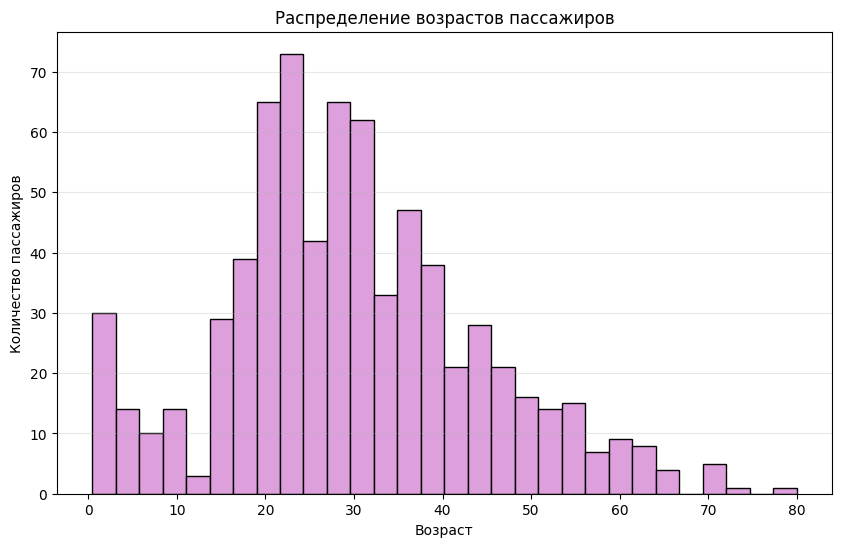

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='plum', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возрастов пассажиров')
plt.grid(axis='y', alpha=0.3)
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

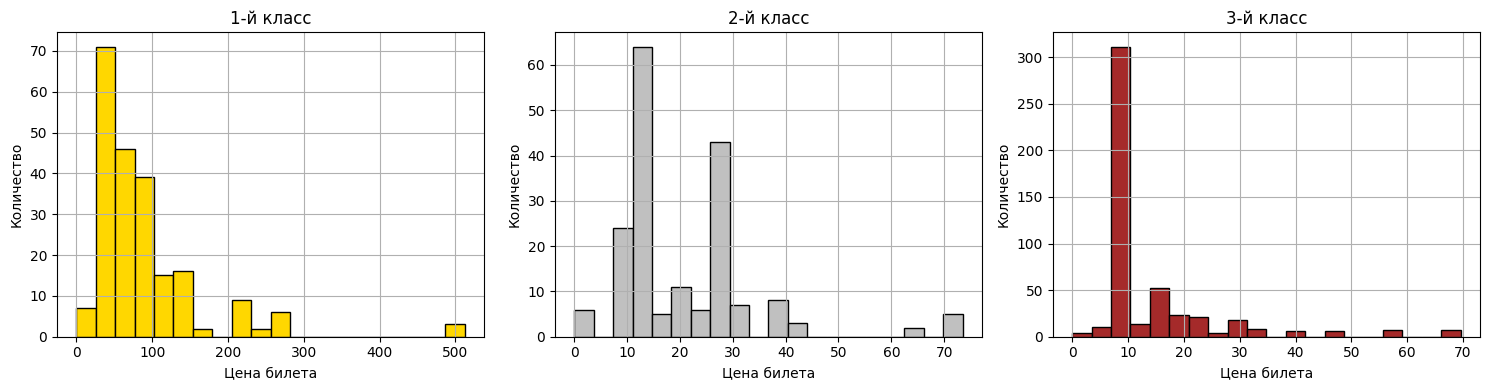

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df[df['Pclass'] == 1]['Fare'].hist(bins=20, ax=axes[0], color='gold', edgecolor='black')
axes[0].set_title('1-й класс')
axes[0].set_xlabel('Цена билета')
axes[0].set_ylabel('Количество')

df[df['Pclass'] == 2]['Fare'].hist(bins=20, ax=axes[1], color='silver', edgecolor='black')
axes[1].set_title('2-й класс')
axes[1].set_xlabel('Цена билета')
axes[1].set_ylabel('Количество')

df[df['Pclass'] == 3]['Fare'].hist(bins=20, ax=axes[2], color='brown', edgecolor='black')
axes[2].set_title('3-й класс')
axes[2].set_xlabel('Цена билета')
axes[2].set_ylabel('Количество')

plt.tight_layout()
plt.show()


3. Постройте зависимость цены от возраста пассажира

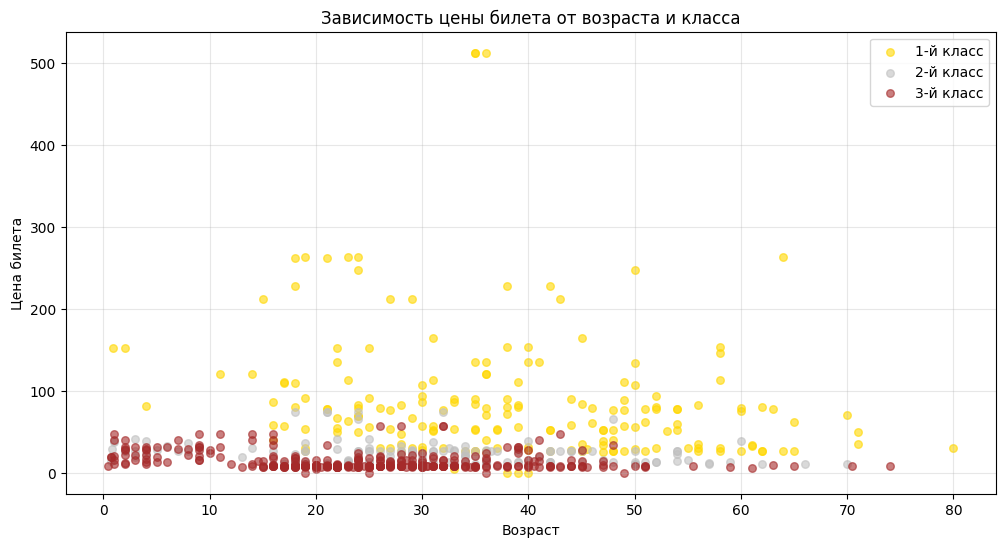

In [27]:
plt.figure(figsize=(12, 6))

colors = {1: 'gold', 2: 'silver', 3: 'brown'}
for pclass in [1, 2, 3]:
    data = df[df['Pclass'] == pclass]
    plt.scatter(data['Age'], data['Fare'], label=f'{pclass}-й класс', 
                color=colors[pclass], alpha=0.6, s=30)

plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.title('Зависимость цены билета от возраста и класса')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


4. Постройте box plot отображающий распределение цен на билеты в разных классах

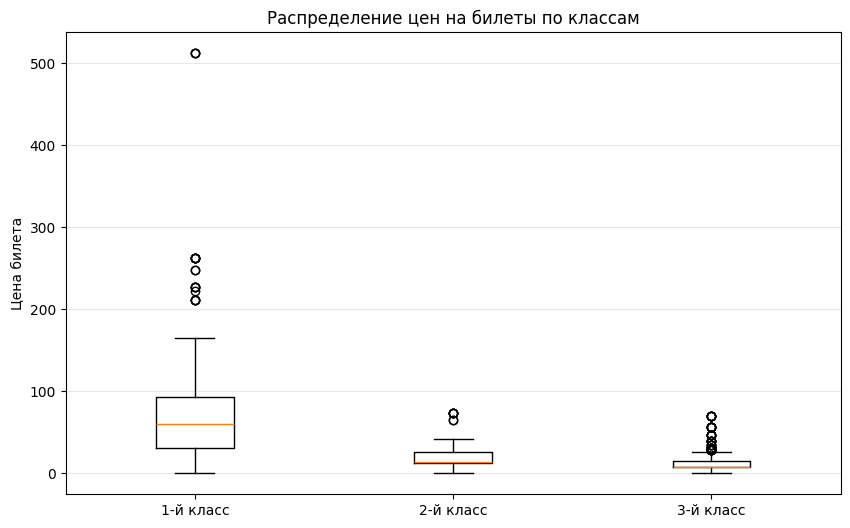

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

data_to_plot = [df[df['Pclass'] == 1]['Fare'].dropna(),
                df[df['Pclass'] == 2]['Fare'].dropna(),
                df[df['Pclass'] == 3]['Fare'].dropna()]

plt.boxplot(data_to_plot, tick_labels=['1-й класс', '2-й класс', '3-й класс'])
plt.ylabel('Цена билета')
plt.title('Распределение цен на билеты по классам')
plt.grid(True, alpha=0.3, axis='y')
plt.show()


5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

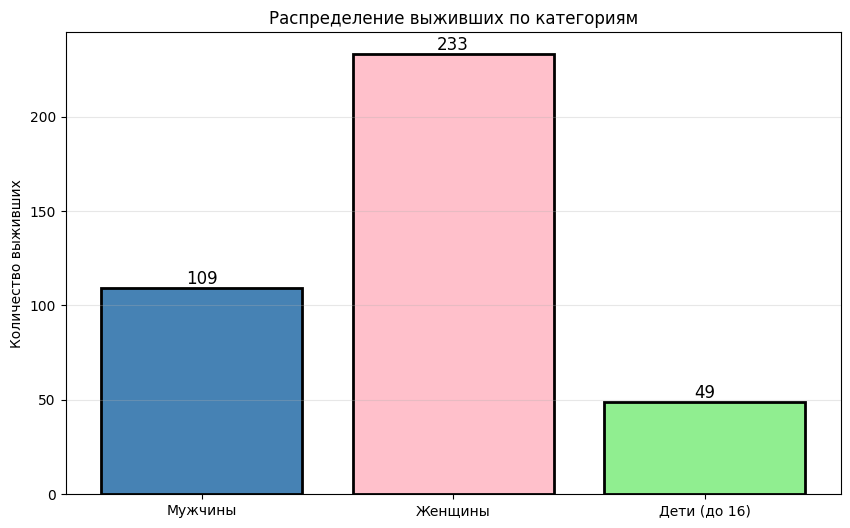

In [29]:
men_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
women_survived = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
children_survived = df[(df['Age'] < 16) & (df['Survived'] == 1)].shape[0]

labels = ['Мужчины', 'Женщины', 'Дети (до 16)']
sizes = [men_survived, women_survived, children_survived]
colors = ['steelblue', 'pink', 'lightgreen']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=colors, edgecolor='black', linewidth=2)
plt.ylabel('Количество выживших')
plt.title('Распределение выживших по категориям')
plt.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.show()


6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

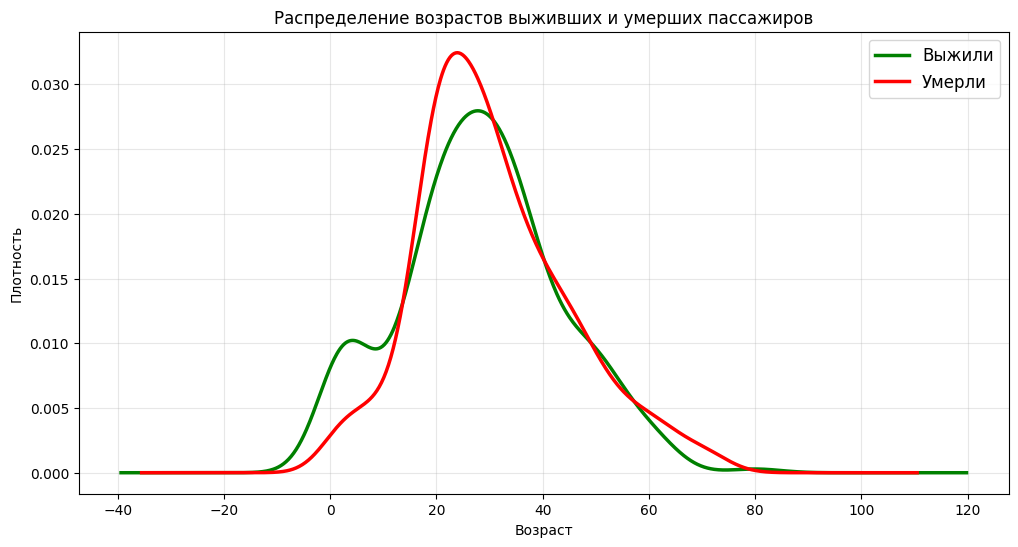

Средний возраст выживших: 28.34 лет
Средний возраст умерших: 30.63 лет

Медиана возраста выживших: 28.00 лет
Медиана возраста умерших: 28.00 лет


In [30]:
plt.figure(figsize=(12, 6))

survived = df[df['Survived'] == 1]['Age'].dropna()
survived.plot(kind='density', label='Выжили', linewidth=2.5, color='green')

dead = df[df['Survived'] == 0]['Age'].dropna()
dead.plot(kind='density', label='Умерли', linewidth=2.5, color='red')

plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.title('Распределение возрастов выживших и умерших пассажиров')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Средний возраст выживших: {survived.mean():.2f} лет")
print(f"Средний возраст умерших: {dead.mean():.2f} лет")
print(f"\nМедиана возраста выживших: {survived.median():.2f} лет")
print(f"Медиана возраста умерших: {dead.median():.2f} лет")


7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)
* Задание на доп. балл

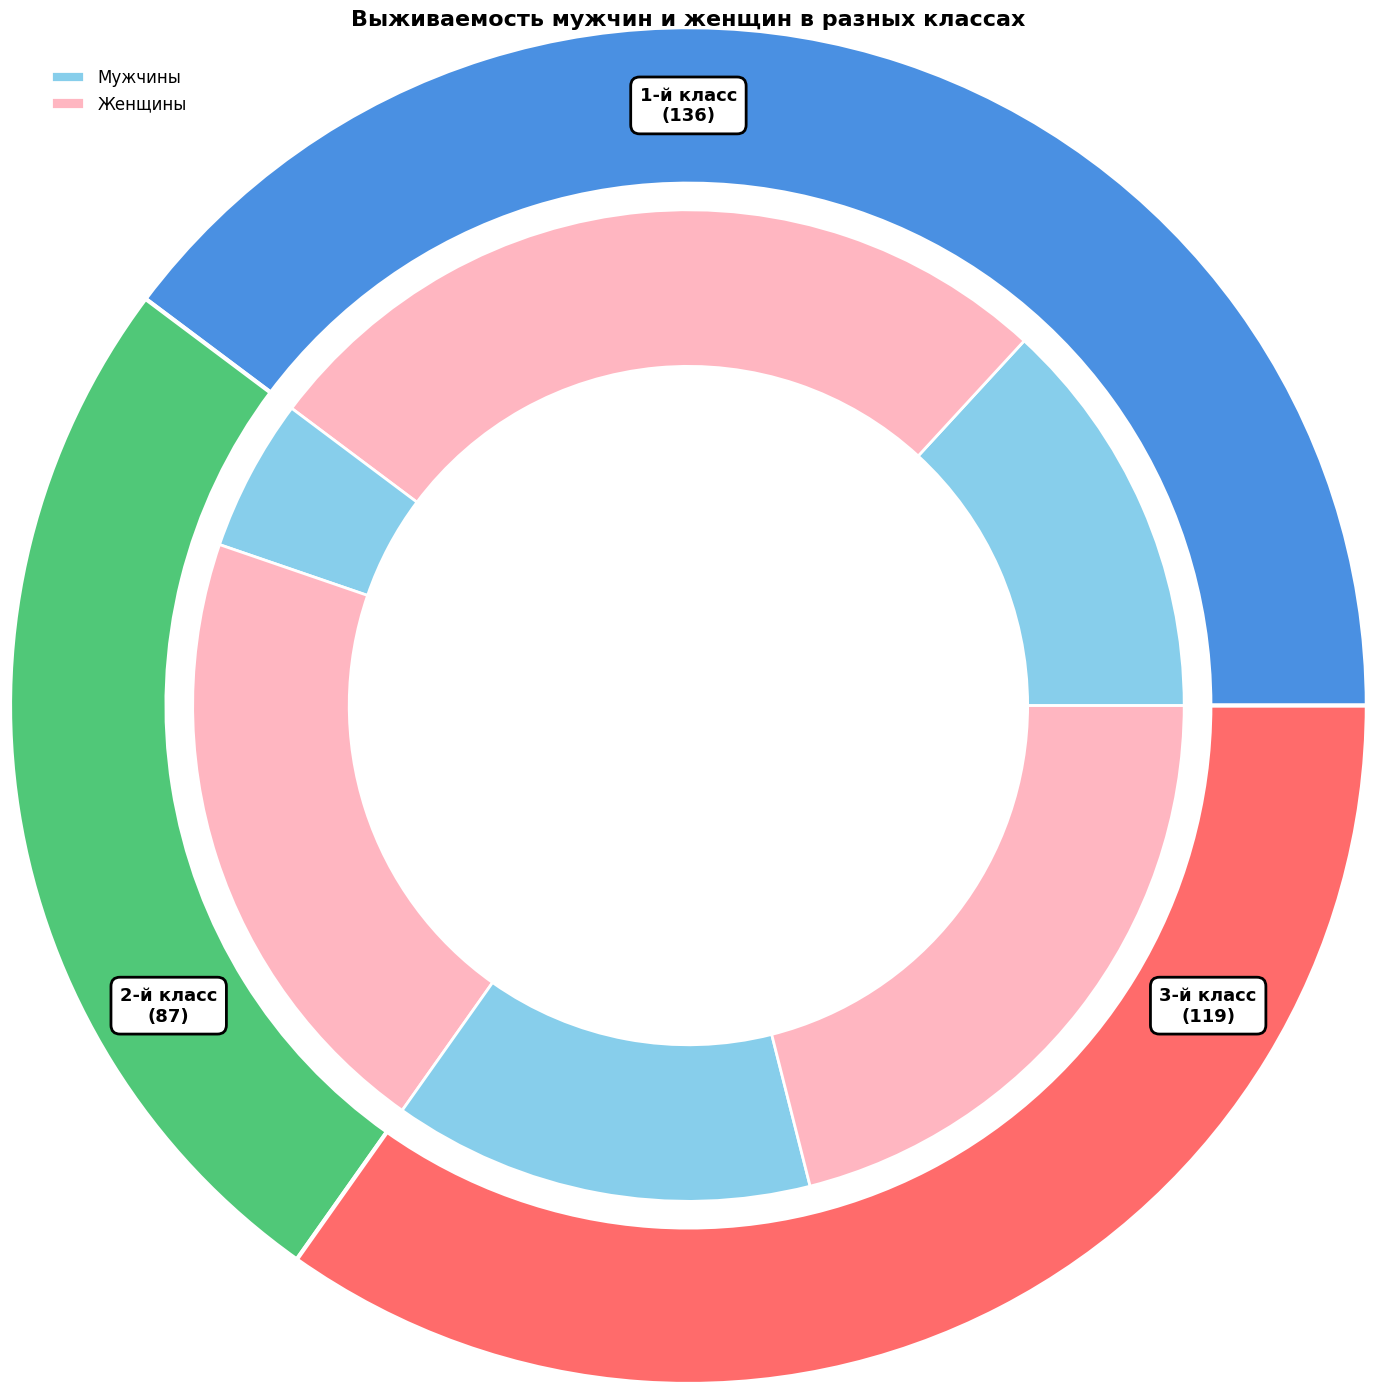

In [31]:
fig, ax = plt.subplots(figsize=(14, 14))

classes = [1, 2, 3]
colors_map = {1: '#4A90E2', 2: '#50C878', 3: '#FF6B6B'}

sizes_outer, labels_outer, colors_outer = [], [], []
sizes_inner, labels_inner, colors_inner = [], [], []

for pclass in classes:
    men = df[(df['Pclass'] == pclass) & (df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
    women = df[(df['Pclass'] == pclass) & (df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]

    sizes_outer.append(men + women)
    labels_outer.append(f'{pclass}-й класс\n({men + women})')
    colors_outer.append(colors_map[pclass])
  
    sizes_inner.extend([men, women])
    labels_inner.extend([f'М:{men}', f'Ж:{women}'])
    colors_inner.extend(['#87CEEB', '#FFB6C1'])

ax.pie(sizes_outer, radius=1.3, wedgeprops=dict(width=0.3, edgecolor='white', linewidth=3), colors=colors_outer)
ax.pie(sizes_inner, colors=colors_inner, radius=0.95, wedgeprops=dict(width=0.3, edgecolor='white', linewidth=2))

angles = [90, 210, 330]  
class_names = ['1-й класс', '2-й класс', '3-й класс']

for angle, name, total in zip(angles, class_names, sizes_outer):
    angle_rad = np.radians(angle)
    x = 1.15 * np.cos(angle_rad)
    y = 1.15 * np.sin(angle_rad)
    
    ax.text(x, y, f'{name}\n({total})', ha='center', va='center',
            fontsize=13, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='white', edgecolor='black', linewidth=2))

from matplotlib.patches import Patch
ax.legend(handles=[
    Patch(facecolor='#87CEEB', edgecolor='white', linewidth=2, label='Мужчины'),
    Patch(facecolor='#FFB6C1', edgecolor='white', linewidth=2, label='Женщины')
], loc='upper left', fontsize=12, frameon=False)

ax.set_title('Выживаемость мужчин и женщин в разных классах', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()
